In [64]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from matplotlib.ticker import FormatStrFormatter
import fnmatch
from datetime import datetime
from pathlib import Path
import os
import scipy.special
import configparser
import datetime
import k2dataset
import k2tools
from PyQt5.QtCore import QMutex
import importlib


In [65]:
importlib.reload(k2dataset)

<module 'k2dataset' from 'K:\\TableTopWattBalance\\KIBB-g2\\k2viewer\\k2dataset.py'>

In [66]:
mutex = QMutex()
kda =   k2dataset.k2Set(mutex)     
kda.setbd0(r'K:\TableTopWattBalance\KIBB-g2\DATA\2404\04\F')
maxgrp = kda.myVelos.totGrps()
for k in range(maxgrp+1):
    print(k)
    kda.myVelos.readGrp(k,Vmul=1000)
    kda.myOns.readGrp(k,Vmul=-1)
    kda.myOffs.readGrp(k,Vmul=-1)
    if k>=1:
        kda.myVelos.fitMe(4)
    kda.myOns.aveForce()
    kda.myOffs.aveForce()


0
0
[0 1 2 3 4 5 6 7 8 9]
0
[0 1 2 3 4 5 6 7 8 9]
1
[10 11 12 13 14 15 16 17 18 19]
1
0
[0 1 2 3 4 5 6 7 8 9]
0
[0 1 2 3 4 5 6 7 8 9]
1
[10 11 12 13 14 15 16 17 18 19]


In [67]:
kda.myVelos.piecewise

[array([1.81758466e-06, 1.39909374e+02])]

In [68]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

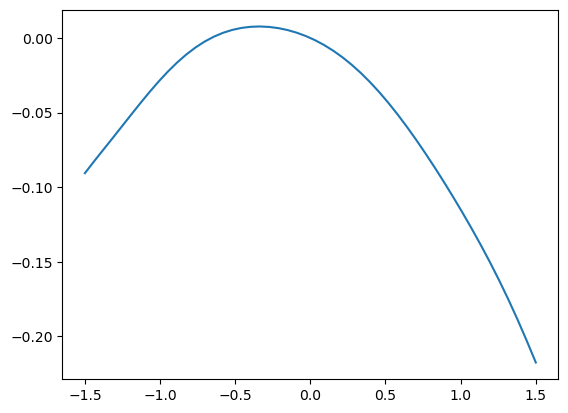

In [69]:
kda.myVelos.fitMe(9)
z=np.linspace(-1.5,1.5)
bl=k2tools.calcProfile(kda.myVelos.fit_pars,kda.myVelos.order,z,kda.myVelos.zmin,kda.myVelos.zmax)
bl0=k2tools.calcProfile(kda.myVelos.fit_pars,kda.myVelos.order,[0],kda.myVelos.zmin,kda.myVelos.zmax)
fig, ax= plt.subplots(1)
ax.plot(z,bl-bl0)

In [70]:
kda.myVelos.fitMe(4)
z=np.linspace(-1.5,1.5)
bl2=k2tools.calcProfile(kda.myVelos.fit_pars,kda.myVelos.order,z,kda.myVelos.zmin,kda.myVelos.zmax)
bl20=k2tools.calcProfile(kda.myVelos.fit_pars,kda.myVelos.order,[0],kda.myVelos.zmin,kda.myVelos.zmax)
dbl2=bl2-bl20

Text(0, 0.5, 'diff in ppm')

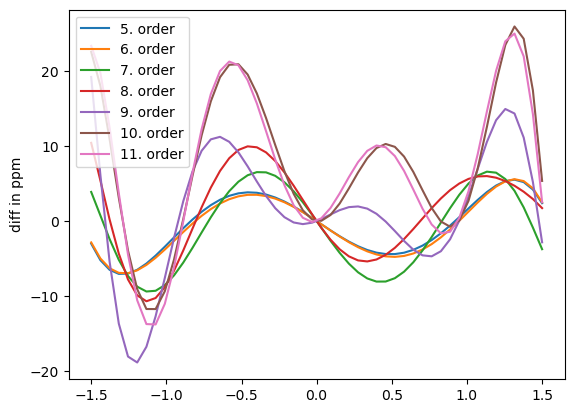

In [71]:
fig, ax= plt.subplots(1)
for i in range(5,12):
    kda.myVelos.fitMe(i)
    bl=k2tools.calcProfile(kda.myVelos.fit_pars,kda.myVelos.order,z,kda.myVelos.zmin,kda.myVelos.zmax)
    bl0=k2tools.calcProfile(kda.myVelos.fit_pars,kda.myVelos.order,[0],kda.myVelos.zmin,kda.myVelos.zmax)
    ax.plot(z,(bl-bl0-dbl2)/139*1e6,label='{0}. order'.format(i))
ax.legend()
ax.set_ylabel('diff in ppm')

In [72]:
kda.myOns.aveForce()

0
[0 1 2 3 4 5 6 7 8 9]


In [73]:
kda.myOffs.adata

array([[ 1.32206424e+02,  3.40000000e-05,  1.03996363e-02,
         0.00000000e+00,  0.00000000e+00,  5.64787821e-01,
         4.45969605e-06,  2.86210356e-04,  0.00000000e+00,
         0.00000000e+00],
       [ 3.30302992e+02, -3.03000000e-05,  1.55743045e-02,
         1.00000000e+00,  0.00000000e+00,  5.65082823e-01,
         5.75818258e-06,  2.74664339e-04,  0.00000000e+00,
         0.00000000e+00]])

In [74]:
np.where(kda.myOns.adata[:,4]<kda.myVelos.maxGrpMem)[0]

array([0], dtype=int64)

In [75]:
kda.myOns.aveForce()

0
[0 1 2 3 4 5 6 7 8 9]


In [76]:
kda.myOns.adata

array([[ 2.31224291e+02,  1.16000000e-05, -7.00404638e+02,
         0.00000000e+00,  0.00000000e+00,  5.64850401e-01,
         9.00024691e-06,  3.26632335e-04,  0.00000000e+00,
         0.00000000e+00]])

In [77]:
kda.myVelos.fitMe(4)
kda.calcMass()

In [78]:
np.where(kda.myOns.data[:,3]==0)[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

49836.25789341527 -9998.488464347176


C:\Users\schlammi\AppData\Local\Temp\1\ipykernel_20792\2661141170.py:4: RankWarning: Polyfit may be poorly conditioned
  pfa = np.polyfit(kda.Mass.ofa_d[:,1],kda.Mass.ofa_d[:,2],1,w=1/kda.Mass.ofa_d[:,3])


Text(0, 0.5, 'bal offs /mg')

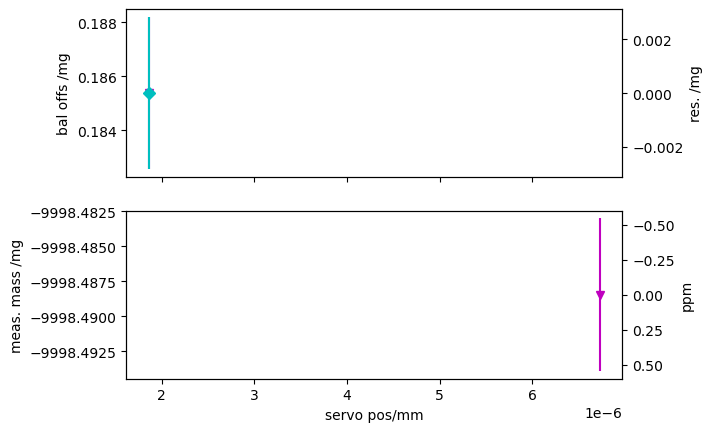

In [79]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.errorbar(kda.Mass.ofa_d[:,1],kda.Mass.ofa_d[:,2],kda.Mass.ofa_d[:,3],fmt='mv')
ax2.errorbar(kda.Mass.dif_d[:,1],kda.Mass.dif_d[:,2],kda.Mass.dif_d[:,3],fmt='mv')
pfa = np.polyfit(kda.Mass.ofa_d[:,1],kda.Mass.ofa_d[:,2],1,w=1/kda.Mass.ofa_d[:,3])
pfd = np.polyfit(kda.Mass.dif_d[:,1],kda.Mass.dif_d[:,2],0,w=1/kda.Mass.dif_d[:,3])
print(pfa[0],pfd[0])
xx = np.linspace(min(kda.Mass.ofa_d[:,1]),max(kda.Mass.ofa_d[:,1]))
ax1.plot(xx,np.poly1d(pfa)(xx),'k-')
ax2.plot(xx,np.poly1d(pfd)(xx),'k-')
axa =ax1.twinx()
axb =ax2.twinx()
axa.errorbar(kda.Mass.ofa_d[:,1],kda.Mass.ofa_d[:,2]-np.poly1d(pfa)(kda.Mass.ofa_d[:,1]),kda.Mass.ofa_d[:,3],fmt='cD')
#axb.errorbar(kda.Mass.dif_d[:,1],kda.Mass.dif_d[:,2]-np.poly1d(pfd)(kda.Mass.dif_d[:,1]),kda.Mass.dif_d[:,3],fmt='cD')

be,en = ax2.get_ylim()
me =0.5*(be+en)
axb.set_ylim((be/me-1)*1e6,(en/me-1)*1e6)
axb.set_ylabel('ppm')
         
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
ax2.set_xlabel('servo pos/mm')
axa.set_ylabel('res. /mg')
ax2.set_ylabel('meas. mass /mg')
ax1.set_ylabel('bal offs /mg')

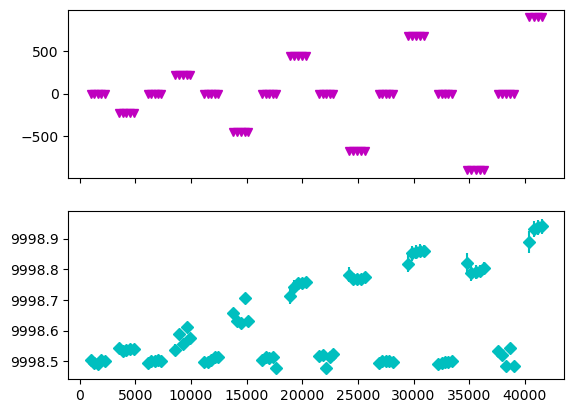

In [97]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.errorbar(kda.Mass.ofa_d[:,0],kda.Mass.ofa_d[:,2],kda.Mass.ofa_d[:,3],fmt='mv')
ax2.errorbar(kda.Mass.dif_d[:,0],kda.Mass.dif_d[:,2],kda.Mass.dif_d[:,3],fmt='cD')
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)

-890.5220452011347 9998.541058087434


Text(0, 0.5, 'bal offs /mg')

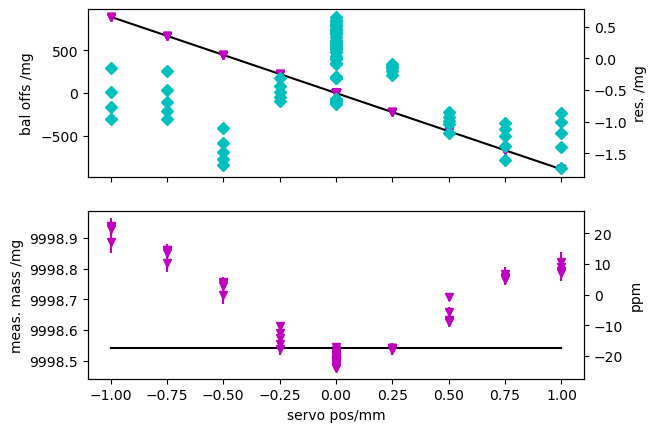

In [98]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.errorbar(kda.Mass.ofa_d[:,1],kda.Mass.ofa_d[:,2],kda.Mass.ofa_d[:,3],fmt='mv')
ax2.errorbar(kda.Mass.dif_d[:,1],kda.Mass.dif_d[:,2],kda.Mass.dif_d[:,3],fmt='mv')
pfa = np.polyfit(kda.Mass.ofa_d[:,1],kda.Mass.ofa_d[:,2],1,w=1/kda.Mass.ofa_d[:,3])
pfd = np.polyfit(kda.Mass.dif_d[:,1],kda.Mass.dif_d[:,2],0,w=1/kda.Mass.dif_d[:,3])
print(pfa[0],pfd[0])
xx = np.linspace(min(kda.Mass.ofa_d[:,1]),max(kda.Mass.ofa_d[:,1]))
ax1.plot(xx,np.poly1d(pfa)(xx),'k-')
ax2.plot(xx,np.poly1d(pfd)(xx),'k-')
axa =ax1.twinx()
axb =ax2.twinx()
axa.errorbar(kda.Mass.ofa_d[:,1],kda.Mass.ofa_d[:,2]-np.poly1d(pfa)(kda.Mass.ofa_d[:,1]),kda.Mass.ofa_d[:,3],fmt='cD')
#axb.errorbar(kda.Mass.dif_d[:,1],kda.Mass.dif_d[:,2]-np.poly1d(pfd)(kda.Mass.dif_d[:,1]),kda.Mass.dif_d[:,3],fmt='cD')

be,en = ax2.get_ylim()
me =0.5*(be+en)
axb.set_ylim((be/me-1)*1e6,(en/me-1)*1e6)
axb.set_ylabel('ppm')
         
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)
ax2.set_xlabel('servo pos/mm')
axa.set_ylabel('res. /mg')
ax2.set_ylabel('meas. mass /mg')
ax1.set_ylabel('bal offs /mg')

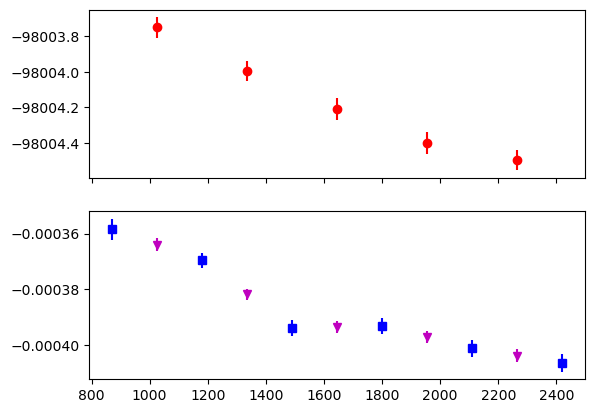

In [229]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.errorbar(m.on_d[:,0],m.on_d[:,1],m.on_d[:,2],fmt='ro')
ax2.errorbar(m.of_d[:,0],m.of_d[:,1],m.of_d[:,2],fmt='bs')
ax2.errorbar(arow[:,0],arow[:,1],arow[:,2],fmt='mv')
ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)

In [221]:
row

array([ 2.26409256e+03, -4.03817229e-04,  2.20697985e-06,  0.00000000e+00])

In [225]:
np.hstack((row,row))

array([ 2.26409256e+03, -4.03817229e-04,  2.20697985e-06,  0.00000000e+00,
        2.26409256e+03, -4.03817229e-04,  2.20697985e-06,  0.00000000e+00])

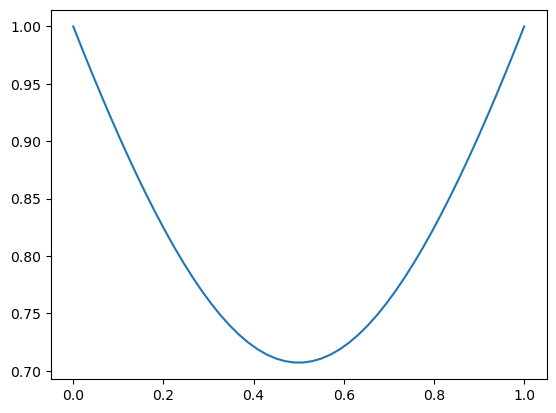

In [211]:
f= np.linspace(0,1)
s= np.sqrt((1-f)**2+f**2)
fig, ax1= plt.subplots(1,sharex=True)
ax1.plot(f,s)


In [180]:
np.shape(m.of_d[:,:])

(18, 4)

In [179]:
np.shape(m.on_d[:,:])

(15, 4)

In [146]:
for ta1,tb,ta3,va1,va3,ua1,ua3 in zip(m.off_t[:-1],m,on_t,m_off_t[

array([-700.41631882, -700.41873681, -700.42087836, -700.42290768,
       -700.42423505, -684.86115338, -684.86658489, -684.87051683,
       -684.87370555, -684.87605639, -700.44455895, -700.44191063,
       -700.44020186, -700.43890804, -700.43760877, -715.94380808,
       -715.93850095, -715.93059126, -715.92912947, -715.92320778,
       -700.42257538, -700.42167486, -700.42164561, -700.42191741,
       -700.42152438, -669.34291637, -669.35092112, -669.35427152,
       -669.36533631, -669.36662649, -700.4456526 , -700.44159966,
       -700.43819994, -700.43580212, -700.43115146, -731.52039237,
       -731.50626698, -731.49734   , -731.48971   , -731.48356134,
       -700.40236326, -700.40290008, -700.40067556, -700.40385618,
       -700.4049779 , -653.88865928, -653.90347011, -653.91386221,
       -653.92208587, -653.928918  , -700.44503222, -700.43957866,
       -700.4358287 , -700.43252983, -700.42960624, -747.25746721,
       -747.23950058, -747.22717369, -747.21745561, -747.20892

In [145]:
kda.myVelos.getpiece(kda.myOns.adata[:,0])

array([139.92220833, 139.92207861, 139.92195009, 139.92182159,
       139.92169286, 139.92119669, 139.9210678 , 139.92093896,
       139.92080743, 139.92067841, 139.92018814, 139.92006142,
       139.91993403, 139.91980731, 139.91968008, 139.91916879,
       139.91904336, 139.91891552, 139.91878982, 139.91866196,
       139.91826979, 139.918201  , 139.91813193, 139.91806222,
       139.91799348, 139.91763258, 139.9175227 , 139.91741448,
       139.917302  , 139.91719411, 139.91684902, 139.91676073,
       139.91667302, 139.91658553, 139.91649731, 139.91619778,
       139.9161237 , 139.91604985, 139.91597491, 139.91589979,
       139.91556995, 139.91546852, 139.91536759, 139.9152665 ,
       139.91516585, 139.91485939, 139.91480064, 139.91474408,
       139.91468816, 139.9146323 , 139.91435344, 139.91426319,
       139.9141731 , 139.91408195, 139.9139913 , 139.9136775 ,
       139.91360783, 139.91353922, 139.91347154, 139.91340284,
       139.91328151, 139.91327757, 139.91327372, 139.91

In [129]:
ix_on = np.where(kda.myOns.adata[:,4]<kda.myVelos.maxGrpMem)[0]

on_t = kda.myOns.adata[ix_on,0]
on_F = kda.myOns.adata[ix_on,2]*kda.myVelos.getpiece(on_t)
on_Func = kda.myOns.adata[ix_on,7]*kda.myVelos.getpiece(on_t)
on_grp = kda.myOns.adata[ix_on,4]

ix_of = np.where(kda.myOffs.adata[:,4]<kda.myVelos.maxGrpMem)[0]
of_t = kda.myOffs.adata[ix_of,0]
of_F = kda.myOffs.adata[ix_of,2]/kda.myVelos.getpiece(of_t)
of_Func = kda.myOffs.adata[ix_of,7]/kda.myVelos.getpiece(of_t)
of_grp = kda.myOffs.adata[ix_of,4]


<ErrorbarContainer object of 3 artists>

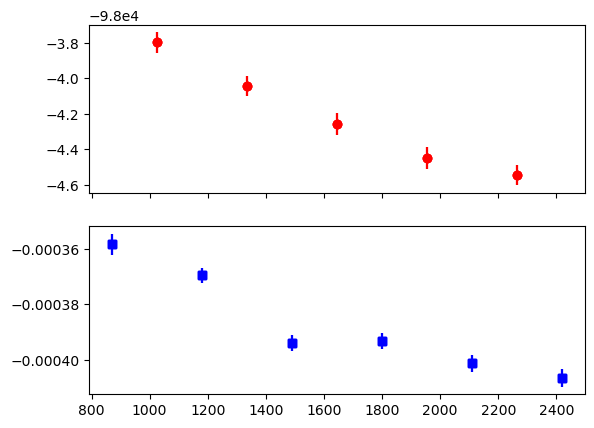

In [130]:
fig, (ax1,ax2) = plt.subplots(2,sharex=True)
ax1.errorbar(on_t,on_F,on_Func,fmt='ro')
ax2.errorbar(of_t,of_F,of_Func,fmt='bs')

In [118]:
(np.mean(on_F)-np.mean(of_F))/kda.c.g

-9988.519669024578

In [108]:
kda.c.mydict['Title']

'10g 5 BL'

In [109]:
on_Func/on_F

array([6.71390132e-07])

In [110]:
9998.6266028578/9998.54188438459-1

8.473082794502318e-06